<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/speed.png?raw=true" width=800 align="left"/>

# 실습 내용

- Cars 데이터를 불러와 살펴봅니다.
- 단순 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/cars.csv'
path = 'https://bit.ly/CarsFile'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [4]:
# 하위 몇 개 행 확인
data.tail()

,speed,dist
45,24,70
46,24,92
47,24,93
48,24,120
49,25,85


In [5]:
# 기술통계 확인
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [6]:
# NaN 값 확인
data.isnull().sum()

speed    0
dist     0
dtype: int64

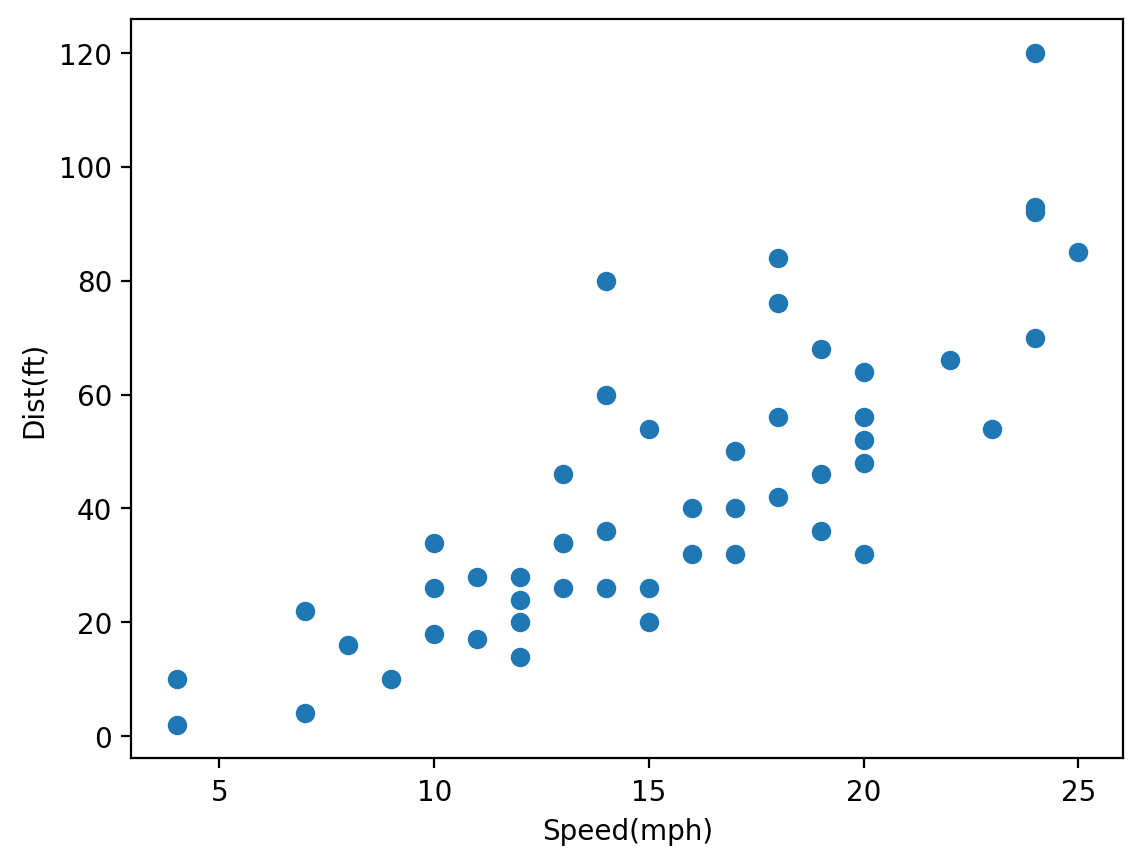

In [7]:
# speed, dist 관계
plt.scatter(x='speed', y='dist', data=data)
plt.xlabel('Speed(mph)')
plt.ylabel('Dist(ft)')
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [8]:
# target 확인
target = 'dist'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [10]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [11]:
# 2단계: 선언하기
model = LinearRegression() # 리니어리그레스는 성능 조절하려면 변수끼리 다중공선성이 있는 컬럼들을 제거하고 필요하면 다른 변수도 추가하고, 좋은 변수들을 갖춰야 성능을 높일 수 있다.
# 반면에 트리나 디션트리는 ㅇㅇㅇ을 하면 성능을 높일 수 있다.

In [12]:
# 3단계: 학습하기
model.fit(x_train, y_train) # 모델아 피팅하자~

LinearRegression()

In [13]:
# 4단계: 예측하기
y_pred = model.predict(x_test) # 모델아, 프레딕트해~

In [14]:
# 5단계: 평가하기

print('MAE : ', mean_absolute_error(y_test, y_pred))
print('R2 : ', r2_score(y_test, y_pred))
# 성능은 그렇게 좋지 않다는 결과가...

MAE :  15.113442990354987
R2 :  0.5548332681132087


- 회귀 계수를 살펴봅니다.

In [16]:
# 회귀계수 확인
print(model.coef_) # 회귀계수
print(model.intercept_) # 편향

[3.91046344]
-16.373364149357656


- 라텍스언어 ㅋㅋㅋ 개웃김
$$ \large  y=ax+b\sum_i^n $$ 

$$ \large Distance = 3.9\times Speed-16.37  $$

# 5.기타

- 기타 필요한 내용이 있으면 진행합니다.

In [18]:
# 회귀식을 만들었으니 회귀선을 만들어보자
# distance = a * speed + b
a = model.coef_      # 회귀계수
b = model.intercept_ # 편향
speed = np.linspace(x_train.min(), x_train.max(), 10) # 리니어스페이스는 어디부터 어디까지 우리가 지정한 계수에 임의로 지정해줌 >> x_train의 최솟값부터 x_train의 최댓값까지 10개만 줘보자
dist = a * speed + b

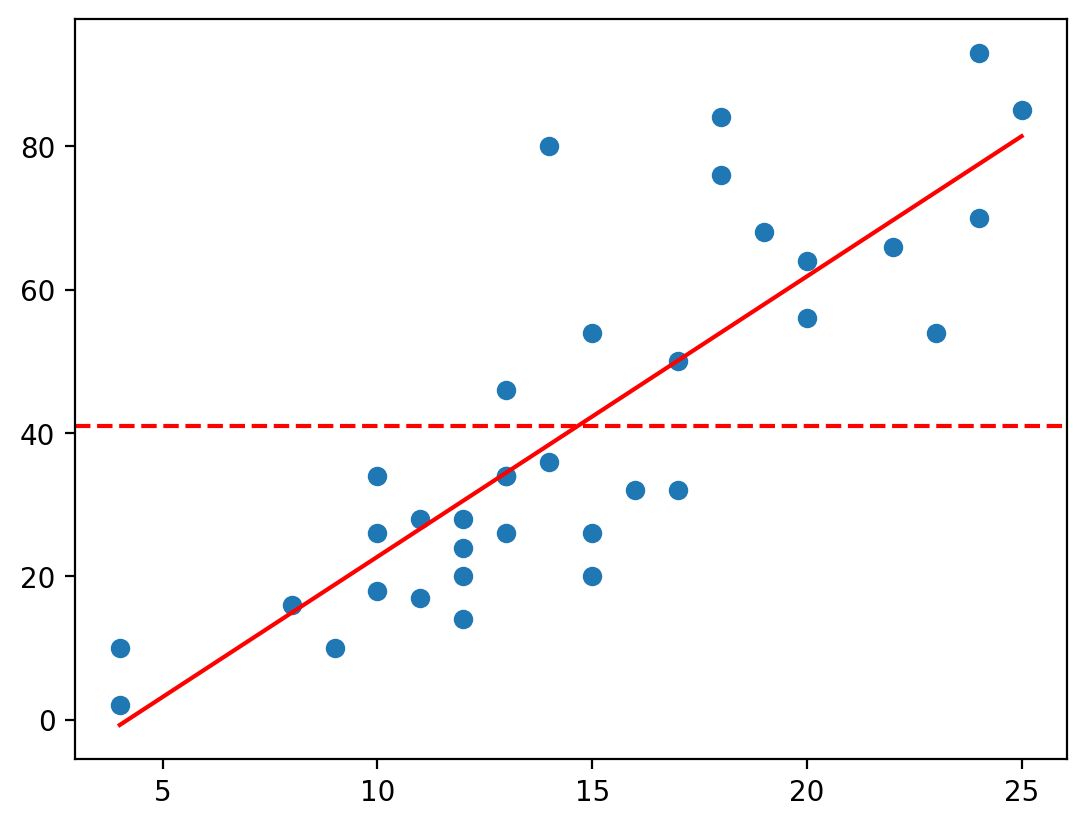

In [21]:
# 학습 데이터 시각화
mean_dist = y_train.mean() # 평균보단 좋다했으니까 자랑하기 위해서 그어봐야지 또

plt.scatter(x_train, y_train) # 스캐터로 x_train 데이터 뿌려보자
# 3과 25로 위에 speed 리니어스페이스 인자로 넣어줘도 되는데 하드코딩하지말고 웬만하면 최솟값 최댓값으로 넣으셈
plt.plot(speed, dist, color='r')
# 모든 점들 오차의 제곱의 합이 이 선이 가장 적다. 조금만 어긋나도 커진대요
# 이 빨간선이 바로 회귀식이고 이것이 바로 우리의 모델이다!

plt.axhline(mean_dist, color='r', linestyle='--') # 이거보단 월등히 좋은 모델을 우리가 만든겨~

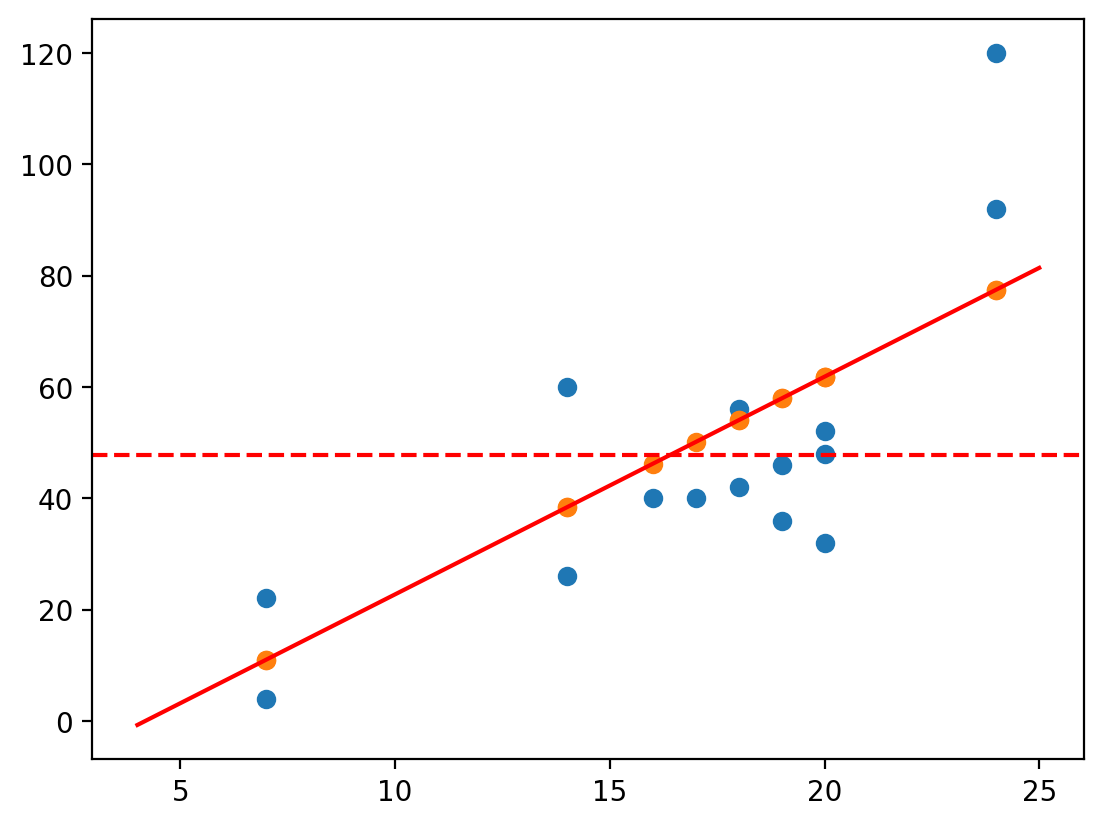

In [24]:
# 테스트 데이터 시각화
mean_dist = y_test.mean() # 평균보단 좋다했으니까 자랑하기 위해서 그어봐야지 또

plt.scatter(x_test, y_test) # 테스트 데이터를 찍어보자
plt.scatter(x_test, y_pred) # y_test 대신 y_pred 찍으면 회귀선 위에 있음 ㅇㅇ 이게 우리 모델이니까.
plt.plot(speed, dist, color='r')

plt.axhline(mean_dist, color='r', linestyle='--') 
# 이 회귀선은 학습데이터일 뿐이다. 테스트데이터랑은 또 다르다. 우리의 기대는 학습데이터와 비슷한 패턴의 데이터가 테스트데이터로 주어지길 바라길 뿐이다.
# 왜? 테스트 데이터는 미래의 데이터이기 때문에 예측할 수가 없다. 회사의 내일 고객이 누가 올지 어떻게 알아? 그냥 평소에 오던 고객이 와주길 바라는거지.
# 얘는 평균을 보면 오차가 엄청 심한데 우리께 그나마 오차가 적지 않냐...

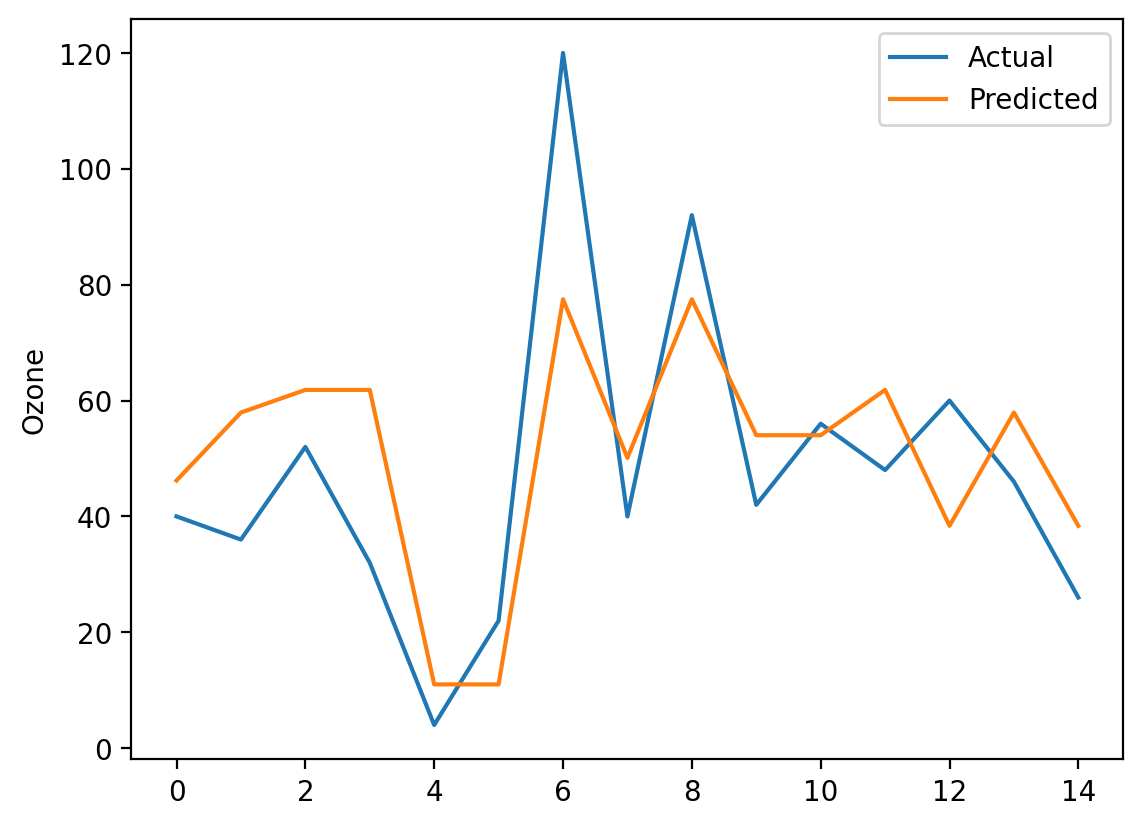

In [17]:
# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('Ozone')
plt.show() # 정확하게 맞히지 못해서 어긋나는 거야 이렇게